In [9]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

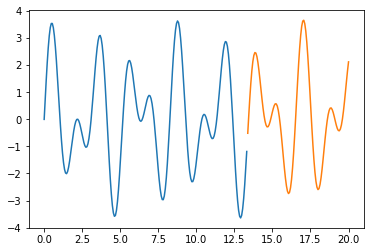

In [5]:
n_sample = 10000                           #作るサンプル数の指定
data_length = 300                          #作る時系列データの大きさ指定
time = 20                                  #作る時系列データの長さ指定

t = np.linspace(0,time,data_length)        #基準の時間軸生成
T = 1 + np.random.random((n_sample,1))*2   #時定数(周波数の逆数)を決める(T=[1,3))
A = 1 + np.random.random((n_sample,1))     #振幅を決める(A=[1,2))
_x = np.random.randn(n_sample,1)           #sin波平行移動用

t_1 = np.linspace(0,time,data_length)        #基準の時間軸生成
T_1 = 1 + np.random.random((n_sample,1))*3   #時定数(周波数の逆数)を決める(T=[1,3))
A_1 = (1 + np.random.random((n_sample,1)))     #振幅を決める(A=[1,2))
_x_1 = np.random.randn(n_sample,1)           #sin波平行移動用

y = A*np.sin((2*np.pi / T)*t.reshape(1,data_length) + _x)    #sin波を適当にn_sample作成(n_sample,data_length)
y_1 = A_1*np.sin((2*np.pi / T_1)*t.reshape(1,data_length) + _x_1)    #sin波を適当にn_sample作成(n_sample,data_length)

y+=y_1
y_origin = y[:,:200]        #教師データ
predict_wave = y[:,200:]

"""

colum_list=[0]*1000
for i in range(1000):
    colum_list[i] = "Wave_"+str(i)

    
DF = pd.DataFrame(y_origin.T,columns=colum_list)
DF.to_csv("future_predict_test.csv")
"""



#二つだけプロット
plt.plot(t[:200],y_origin[0])
plt.plot(t[200:],predict_wave[0])

In [11]:
X = y_origin[0]
y = predict_wave[0]

SVR_rbf = SVR(kernel="rbf", C=1e3, gamma=0.1)
SVR_rbf.fit(X,y).predict

ValueError: Expected 2D array, got 1D array instead:
array=[-8.49673848e-03  7.22009422e-01  1.42771212e+00  2.07438118e+00
  2.63080181e+00  3.07053183e+00  3.37337719e+00  3.52649666e+00
  3.52506934e+00  3.37248596e+00  3.08005461e+00  2.66624127e+00
  2.15549486e+00  1.57673154e+00  9.61574135e-01  3.42457215e-01
 -2.49284168e-01 -7.85223598e-01 -1.24143925e+00 -1.59979986e+00
 -1.84886421e+00 -1.98434279e+00 -2.00909839e+00 -1.93269209e+00
 -1.77050998e+00 -1.54253271e+00 -1.27183215e+00 -9.82896766e-01
 -6.99897265e-01 -4.45007542e-01 -2.36891233e-01 -8.94529784e-02
 -1.09354878e-02 -3.42046041e-03 -6.27646103e-02 -1.78973260e-01
 -3.36985062e-01 -5.17814262e-01 -6.99973267e-01 -8.61079667e-01
 -9.79539505e-01 -1.03619325e+00 -1.01581305e+00 -9.08349037e-01
 -7.09838819e-01 -4.22915469e-01 -5.68757719e-02  3.72701310e-01
  8.44766540e-01  1.33399511e+00  1.81229131e+00  2.25050971e+00
  2.62028454e+00  2.89585117e+00  3.05574304e+00  3.08425441e+00
  2.97257329e+00  2.71950910e+00  2.33176470e+00  1.82373075e+00
  1.21681036e+00  5.38311412e-01 -1.80028774e-01 -9.03798473e-01
 -1.59784052e+00 -2.22823830e+00 -2.76423798e+00 -3.17998984e+00
 -3.45600275e+00 -3.58022337e+00 -3.54867516e+00 -3.36561934e+00
 -3.04322965e+00 -2.60080317e+00 -2.06355762e+00 -1.46109149e+00
 -8.25603684e-01 -1.89983792e-01  4.14108337e-01  9.58055325e-01
  1.41787635e+00  1.77550622e+00  2.01968368e+00  2.14639843e+00
  2.15887462e+00  2.06709847e+00  1.88692627e+00  1.63883585e+00
  1.34640694e+00  1.03463224e+00  7.28171757e-01  4.49665252e-01
  2.18213332e-01  4.81260257e-02 -5.19805244e-02 -7.96817357e-02
 -3.88060857e-02  6.09413041e-02  2.04765840e-01  3.73927141e-01
  5.47161483e-01  7.02286789e-01  8.17881797e-01  8.74925933e-01
  8.58288695e-01  7.57966915e-01  5.69984465e-01  2.96890769e-01
 -5.21794945e-02 -4.61894534e-01 -9.11541254e-01 -1.37622042e+00
 -1.82834784e+00 -2.23936771e+00 -2.58156977e+00 -2.82989441e+00
 -2.96360935e+00 -2.96774917e+00 -2.83422286e+00 -2.56251508e+00
 -2.15993199e+00 -1.64137088e+00 -1.02862285e+00 -3.49247005e-01
  3.64918075e-01  1.07951688e+00  1.75960734e+00  2.37164175e+00
  2.88537774e+00  3.27560252e+00  3.52356508e+00  3.61802911e+00
  3.55588270e+00  3.34226844e+00  2.99022717e+00  2.51987882e+00
  1.95719245e+00  1.33242260e+00  6.78309813e-01  2.81571318e-02
 -5.86098533e-01 -1.13570148e+00 -1.59666813e+00 -1.95105782e+00
 -2.18784853e+00 -2.30336780e+00 -2.30125786e+00 -2.19198347e+00
 -1.99192002e+00 -1.72208594e+00 -1.40660565e+00 -1.07100575e+00
 -7.40457304e-01 -4.38079387e-01 -1.83414541e-01  8.82544294e-03
  1.29663042e-01  1.76350980e-01  1.52430768e-01  6.73528389e-02
 -6.43138505e-02 -2.24027828e-01 -3.90698437e-01 -5.42289895e-01
 -6.57497546e-01 -7.17382840e-01 -7.06856135e-01 -6.15906110e-01
 -4.40490999e-01 -1.83028749e-01  1.47550667e-01  5.36199008e-01
  9.62568571e-01  1.40220708e+00  1.82805479e+00  2.21214960e+00
  2.52743187e+00  2.74953300e+00  2.85843229e+00  2.83987360e+00
  2.68644821e+00  2.39827055e+00  1.98319886e+00  1.45658135e+00
  8.40538171e-01  1.62819012e-01 -5.44697188e-01 -1.24777079e+00
 -1.91173167e+00 -2.50345373e+00 -2.99325324e+00 -3.35659475e+00
 -3.57550006e+00 -3.63957403e+00 -3.54658435e+00 -3.30256046e+00
 -2.92140608e+00 -2.42405041e+00 -1.83719107e+00 -1.19170742e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.